In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import configparser
import os
from pathlib import Path

import aps
import aps.ai.autoalignment.beamline28IDB.optimization.analysis_utils as analysis
import aps.ai.autoalignment.beamline28IDB.optimization.common as opt_common
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import scipy
from IPython.display import Image, display_png

%matplotlib inline

28-ID - VKB Pitch Motor Resolution: 2e-05 deg
Qt5Agg: unable to import specified backend (or its dependency); no plots


**** The executable "caRepeater" couldn't be located
**** because of errno = "No such file or directory".
**** You may need to modify your PATH environment variable.
**** Unable to start "CA Repeater" process.
Traceback (most recent call last):
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot.py", line 57, in uti_plot_init
    _backend = uti_plot_matplotlib.Backend(backend, fname_format)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 27, in __init__
    backend = self._init_ipython(backend)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 724, in _init_ipython
    get_ipython().magic('matplotlib ' + b)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.

In [3]:
exp_type = 'peak_fwhm_nlpi'

In [4]:
#base_dir = Path(aps.__file__).parents[1]
#autoalign_dir = base_dir / f'work_directory/28-ID/AI/autoalignment/'
autoalign_dir = Path("/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/")
data_base_dir = autoalign_dir / exp_type / 'all_motors'
print(f'data base dir exists {data_base_dir.exists()}')


data base dir exists True


In [5]:
!ls {data_base_dir}

peak_fwhm_nlpi_moo_100_2022-11-21_images
peak_fwhm_nlpi_moo_100_2022-11-21_steps
peak_fwhm_nlpi_moo_autofocusing.ini
peak_fwhm_nlpi_moo_optimization_final_101_2022-11-21_14:32.gz


### peak_fwhm_150_2022-11-18

In [6]:
!ls {data_base_dir}

peak_fwhm_nlpi_moo_100_2022-11-21_images
peak_fwhm_nlpi_moo_100_2022-11-21_steps
peak_fwhm_nlpi_moo_autofocusing.ini
peak_fwhm_nlpi_moo_optimization_final_101_2022-11-21_14:32.gz


In [8]:
log_file = Path(data_base_dir / 'peak_fwhm_nlpi_moo_optimization_final_101_2022-11-21_14:32.gz')
log_file.exists()

True

In [9]:
hist_dir = Path(data_base_dir / 'peak_fwhm_nlpi_moo_100_2022-11-21_steps')
hist_dir.exists()

True

In [13]:
study = analysis.create_study_from_trials(log_file, n_objectives=3)

[I 2022-11-22 17:05:14,104] A new study created in memory with name: no-name-0fdf6039-eb7a-4251-b0f7-e187d0d36664


Assuming minimization for all objectives.


In [14]:
n_steps = len(study.trials)

In [15]:
hists = analysis.load_histograms_from_files(n_steps, hist_dir, extension='gz')

Trial values: peak_distance 8.281e-02 fwhm 4.011e-02 nlpi -1.065e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39063298661392115, 'h_fwhm': 0.03771746178786728, 'h_centroid': -0.00507930528029768, 'h_peak': -0.07250856878184349, 'v_sigma': 0.457689515966432, 'v_fwhm': 0.013655334114889284, 'v_centroid': 0.008486443643079294, 'v_peak': -0.03999062133645954, 'integral_intensity': 285.23463791034146, 'peak_intensity': 42153.145, 'gaussian_fit': {}}}


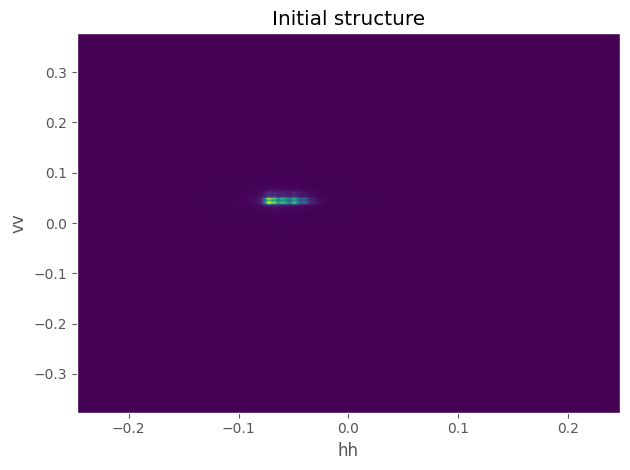

In [33]:
print(f"Trial values: peak_distance {study.trials[0].values[0]:4.3e} fwhm {study.trials[0].values[1]:4.3e} "
     f"nlpi {study.trials[0].values[2]:4.3e}")
print("Trial dw:")
print(study.trials[0].user_attrs["dw"].__dict__)


plt.pcolormesh(hists[0].hh[700:-700], hists[0].vv[700:-700], hists[0].data_2D[700:-700,700:-700].T)
plt.xlabel('hh')
plt.ylabel('vv')
plt.title("Initial structure")
plt.tight_layout()
plt.show()

In [16]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [17]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)
print("Actual fwhm (not with reference)", opt_common._get_fwhm_from_dw(nash_trial.user_attrs["dw"]))

[53, 54, 68, 63, 20, 57, 57, 71, 62, 14]
77 [0.012034626548241124, 0.014742877858418896, -11.088897705078125]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3917526845578378, 'h_fwhm': 0.011055118110236961, 'h_centroid': -0.0012383140398943004, 'h_peak': -0.009429365446966131, 'v_sigma': 0.45924454605224757, 'v_fwhm': 0.009753810082063774, 'v_centroid': 0.006272393729202852, 'v_peak': -0.007477921062915232, 'integral_intensity': 282.9832860306218, 'peak_intensity': 65440.574, 'gaussian_fit': {}}}
Actual fwhm (not with reference) 0.014742877858418896


Trial number 19
Trial values: peak_distance 3.591e-03 fwhm 1.518e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3905650048591323, 'h_fwhm': 0.011055118110236961, 'h_centroid': -0.00014923123771573565, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.4578402389852559, 'v_fwhm': 0.010404064087534692, 'v_centroid': 0.005914265675858149, 'v_peak': -0.003576397030089868, 'integral_intensity': 285.068849385234, 'peak_intensity': 65142.484, 'gaussian_fit': {}}}
Actual fwhm 0.015180915188776279


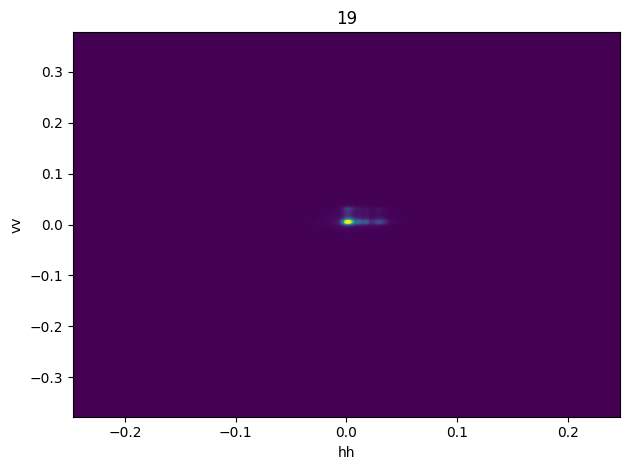

Trial number 36
Trial values: peak_distance 3.591e-03 fwhm 1.573e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39068677046867173, 'h_fwhm': 0.013656322371469187, 'h_centroid': -0.0003062280136606199, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.45795109732874745, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.005955664730840776, 'v_peak': -0.003576397030089868, 'integral_intensity': 284.7598158938527, 'peak_intensity': 65184.168, 'gaussian_fit': {}}}
Actual fwhm 0.015728404236550825


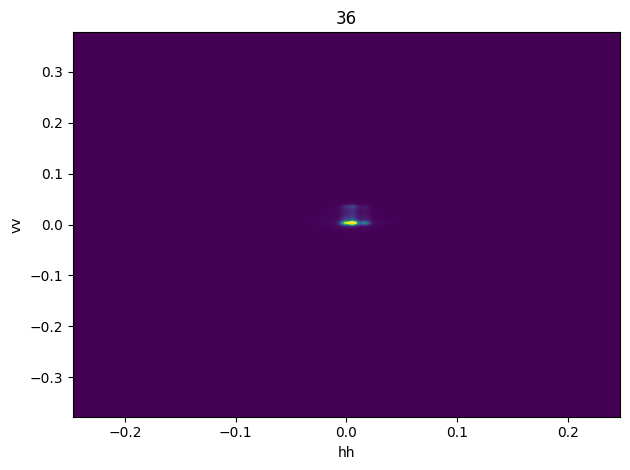

Trial number 50
Trial values: peak_distance 1.437e-02 fwhm 1.172e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3904756596276825, 'h_fwhm': 0.009754515979620848, 'h_centroid': -0.0007217267500834734, 'h_peak': -0.008779064381658213, 'v_sigma': 0.4577662242647119, 'v_fwhm': 0.006502540054709183, 'v_centroid': 0.006577692401852686, 'v_peak': -0.011379445095740596, 'integral_intensity': 284.91088209482393, 'peak_intensity': 65308.47, 'gaussian_fit': {}}}
Actual fwhm 0.011723208142815505


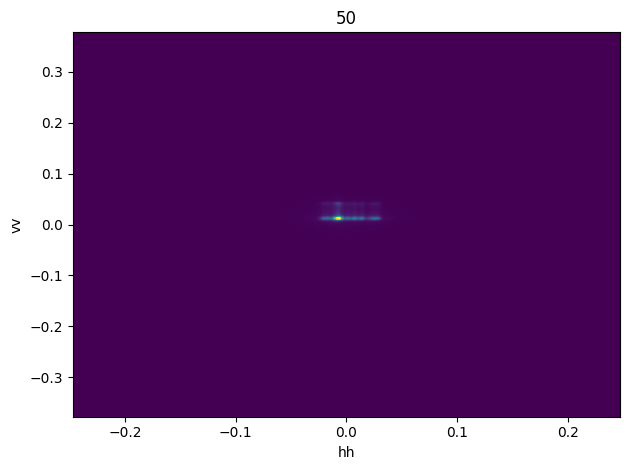

Trial number 52
Trial values: peak_distance 1.986e-02 fwhm 1.317e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.390930900548206, 'h_fwhm': 0.011055118110236961, 'h_centroid': 0.0010308589103857901, 'h_peak': 0.012680870773506308, 'v_sigma': 0.4580261590204794, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.004726936516298491, 'v_peak': 0.015280969128565813, 'integral_intensity': 284.8682035926864, 'peak_intensity': 65342.61, 'gaussian_fit': {}}}
Actual fwhm 0.01316731177190838


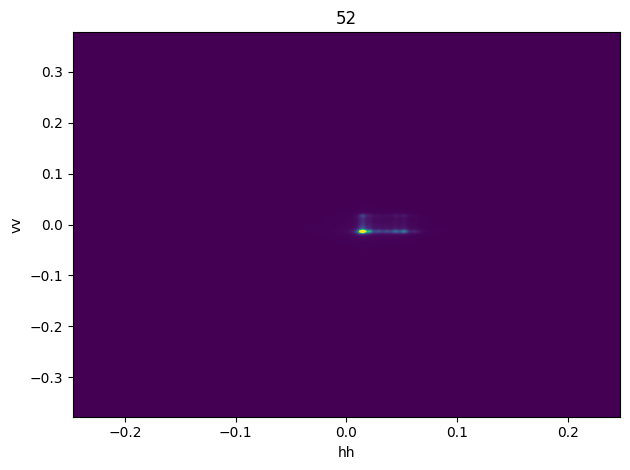

Trial number 57
Trial values: peak_distance 4.884e-02 fwhm 1.199e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.390791150433014, 'h_fwhm': 0.009104214914312792, 'h_centroid': -0.0021715986768683637, 'h_peak': -0.028938397406206604, 'v_sigma': 0.4580798634572702, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.003000552966626574, 'v_peak': 0.03934036733098855, 'integral_intensity': 284.5410648901891, 'peak_intensity': 65348.445, 'gaussian_fit': {}}}
Actual fwhm 0.011990591658498573


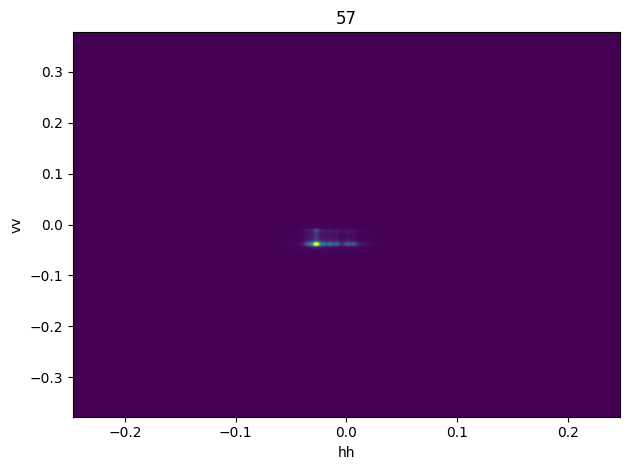

Trial number 64
Trial values: peak_distance 9.069e-03 fwhm 1.291e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39042058298575383, 'h_fwhm': 0.009754515979620848, 'h_centroid': 4.494099285551334e-05, 'h_peak': -0.0022760537285780058, 'v_sigma': 0.45778684300390593, 'v_fwhm': 0.008453302071121938, 'v_centroid': 0.005254378439199792, 'v_peak': 0.008778429073856921, 'integral_intensity': 284.6812246635373, 'peak_intensity': 65200.895, 'gaussian_fit': {}}}
Actual fwhm 0.012907706918826166


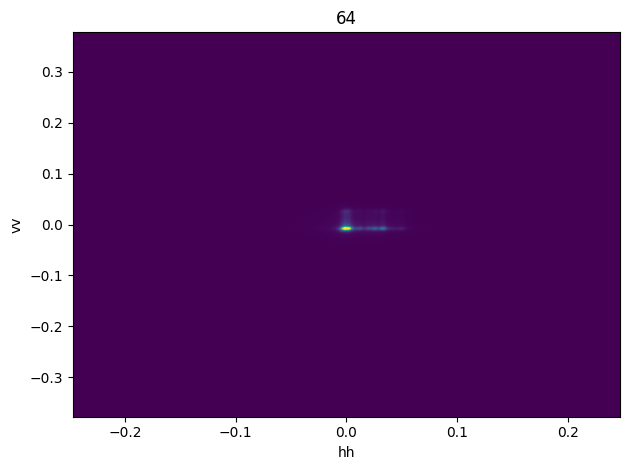

Trial number 65
Trial values: peak_distance 7.019e-03 fwhm 1.444e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39055831841404076, 'h_fwhm': 0.011705419175545018, 'h_centroid': -0.0004827783027132049, 'h_peak': -0.006828161185734166, 'v_sigma': 0.4578184968684027, 'v_fwhm': 0.008453302071121938, 'v_centroid': 0.005900284641996184, 'v_peak': -0.0016256350136773334, 'integral_intensity': 285.0170776828947, 'peak_intensity': 65230.117, 'gaussian_fit': {}}}
Actual fwhm 0.014438668705280672


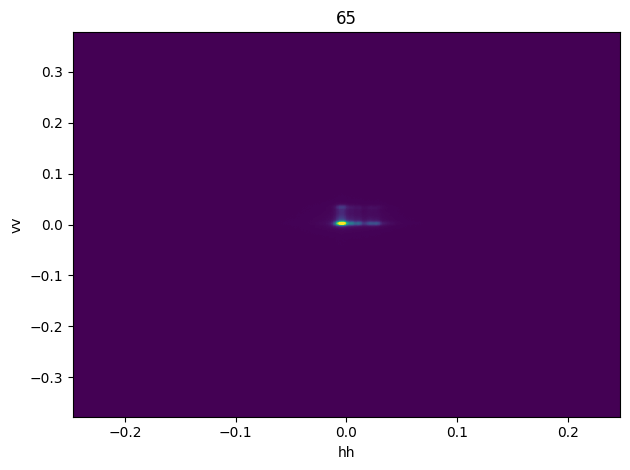

Trial number 77
Trial values: peak_distance 1.203e-02 fwhm 1.474e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3917526845578378, 'h_fwhm': 0.011055118110236961, 'h_centroid': -0.0012383140398943004, 'h_peak': -0.009429365446966131, 'v_sigma': 0.45924454605224757, 'v_fwhm': 0.009753810082063774, 'v_centroid': 0.006272393729202852, 'v_peak': -0.007477921062915232, 'integral_intensity': 282.9832860306218, 'peak_intensity': 65440.574, 'gaussian_fit': {}}}
Actual fwhm 0.014742877858418896


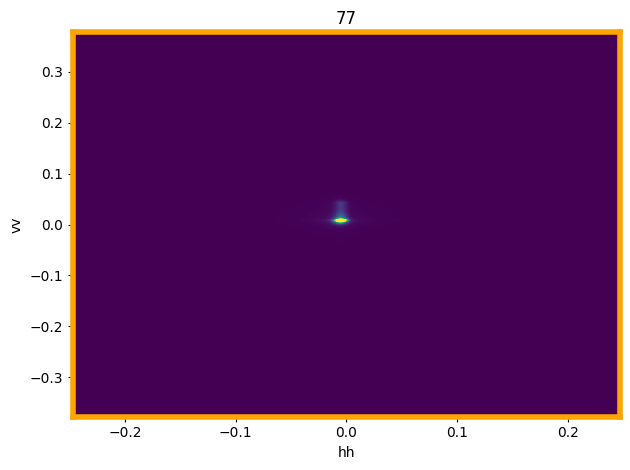

Trial number 80
Trial values: peak_distance 1.138e-02 fwhm 1.535e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39158006316121, 'h_fwhm': 0.012355720240853074, 'h_centroid': -0.0005483100804433705, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.4590939034572857, 'v_fwhm': 0.009103556076592856, 'v_centroid': 0.0049985526299919925, 'v_peak': 0.011379445095740449, 'integral_intensity': 283.51418278168813, 'peak_intensity': 65321.793, 'gaussian_fit': {}}}
Actual fwhm 0.015347265421237006


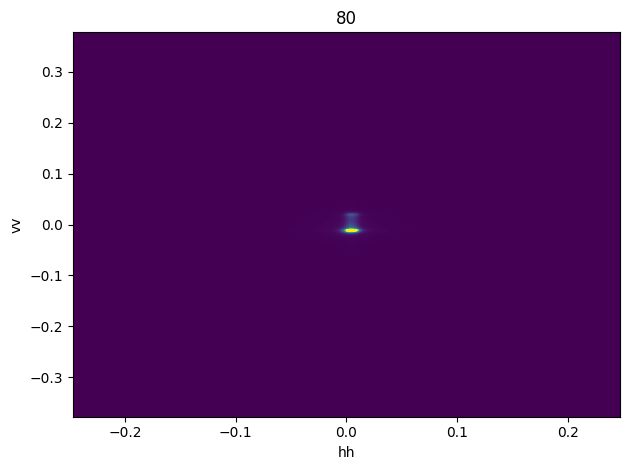

Trial number 100
Trial values: peak_distance 5.846e-02 fwhm 1.334e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39119259188274974, 'h_fwhm': 0.009104214914312792, 'h_centroid': -0.0010075673388159068, 'h_peak': -0.005527559055118184, 'v_sigma': 0.45885890726875084, 'v_fwhm': 0.009753810082063774, 'v_centroid': 0.0022376369691274045, 'v_peak': 0.058197733489644375, 'integral_intensity': 283.83829041745156, 'peak_intensity': 65446.844, 'gaussian_fit': {}}}
Actual fwhm 0.013342546245861935


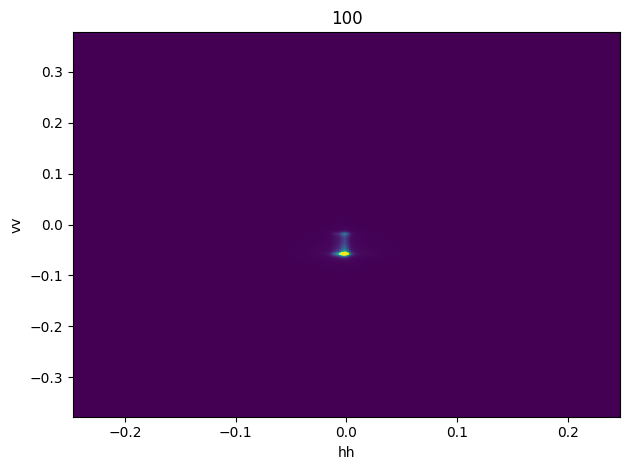

In [18]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    print("Actual fwhm", opt_common._get_fwhm_from_dw(t.user_attrs["dw"]))
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    if t.number == nash_trial.number:
        for axis in ['top','bottom','left','right']:
            plt.gca().spines[axis].set_linewidth(4)
            plt.gca().spines[axis].set_color('orange')
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.title(t.number)
    plt.tight_layout()
    plt.show()

In [19]:
study.best_trials[0].values

[0.003591147252024175, 0.015180915188776279, -11.084332466125488]

In [20]:
pareto_df = analysis.get_pareto_dataframe_from_study(study, ['peak_distance', 'delta_fwhm', 'nlpi'])

In [21]:
pareto_df

,number,peak_distance,delta_fwhm,nlpi,h_peak,v_peak,h_fwhm,v_fwhm,peak_intensity
19,19,0.003591,0.015181,-11.084332,-0.000325,-0.003576,0.011055,0.010404,65142.484375
36,36,0.003591,0.015728,-11.084972,-0.000325,-0.003576,0.013656,0.007803,65184.167969
50,50,0.014372,0.011723,-11.086877,-0.008779,-0.011379,0.009755,0.006503,65308.468750
52,52,0.019857,0.013167,-11.087399,0.012681,0.015281,0.011055,0.007153,65342.609375
57,57,0.048837,0.011991,-11.087489,-0.028938,0.039340,0.009104,0.007803,65348.445312
64,64,0.009069,0.012908,-11.085229,-0.002276,0.008778,0.009755,0.008453,65200.894531
65,65,0.007019,0.014439,-11.085676,-0.006828,-0.001626,0.011705,0.008453,65230.117188
77,77,0.012035,0.014743,-11.088898,-0.009429,-0.007478,0.011055,0.009754,65440.574219
80,80,0.011384,0.015347,-11.087081,-0.000325,0.011379,0.012356,0.009104,65321.792969
100,100,0.058460,0.013343,-11.088994,-0.005528,0.058198,0.009104,0.009754,65446.843750


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_99938/2375896861.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "delta_fwhm", "nlpi"], include_dominated_trials=False)


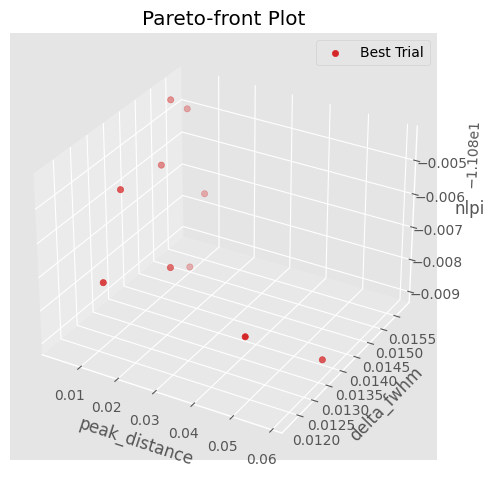

In [22]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "delta_fwhm", "nlpi"], include_dominated_trials=False)
#plt.scatter(*nash_trial.values, color='orange', label='Nash')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_99938/320309324.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")


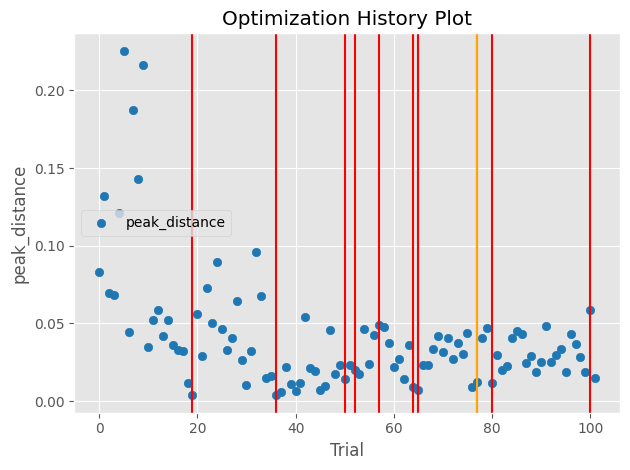

In [23]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_99938/1279663034.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="delta_fwhm")


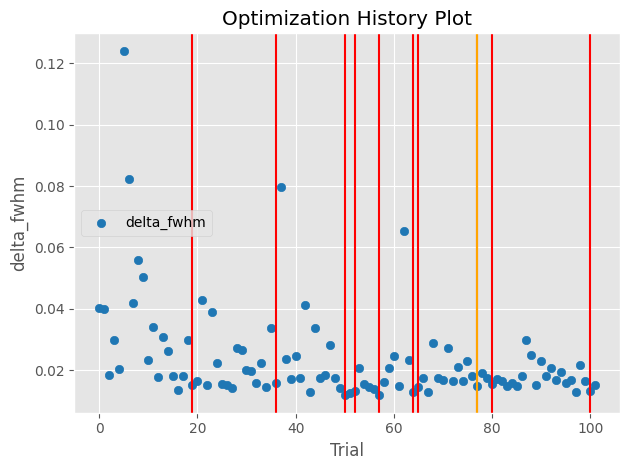

In [24]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="delta_fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_99938/3199083138.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[2], target_name="nlpi")


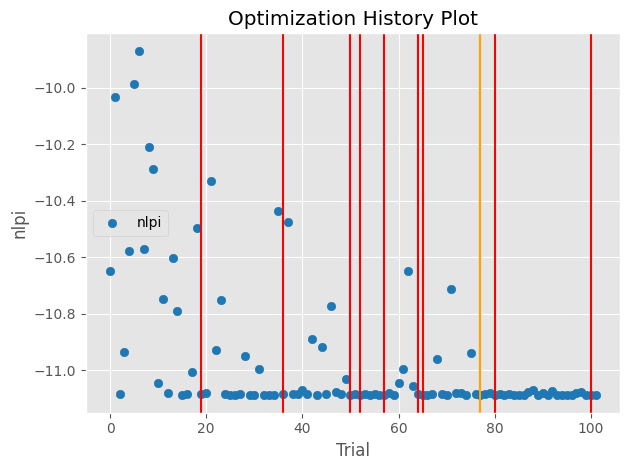

In [25]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[2], target_name="nlpi")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [26]:
isums = []
wsums_no_thres = []
wsums_thres = []
for h in hists:
    isum1, wsum1 = analysis.calculate_weighted_sum(h, threshold=0)
    isum2, wsum2 = analysis.calculate_weighted_sum(h)
    isums.append((isum1, isum2))
    wsums_no_thres.append(wsum1)
    wsums_thres.append(wsum2)
isums = np.array(isums)
wsums_no_thres = np.array(wsums_no_thres)
wsums_thres = np.array(wsums_thres)
                      

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_99938/214102518.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),


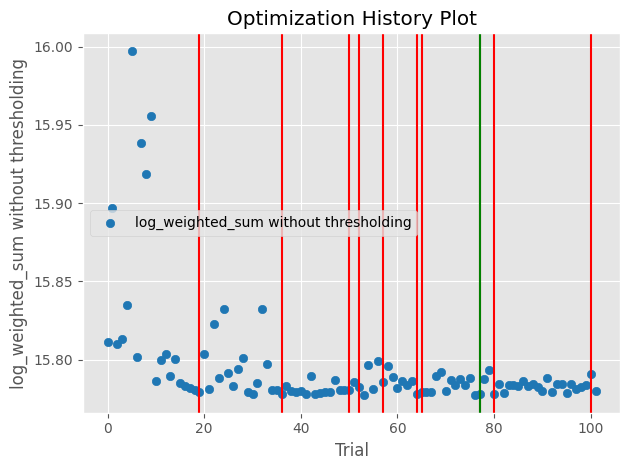

In [27]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),
                                                          target_name="log_weighted_sum without thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_99938/2958963105.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),


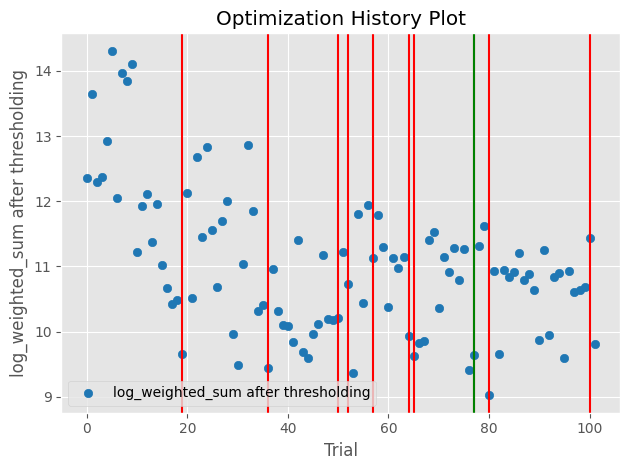

In [28]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
                                                          target_name="log_weighted_sum after thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [29]:
test_val_fns = [lambda t: t.values[0], lambda t: t.values[2], lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins))

77


30 [0.01037407627418629, -11.085554122924805, 9.489972038618548]


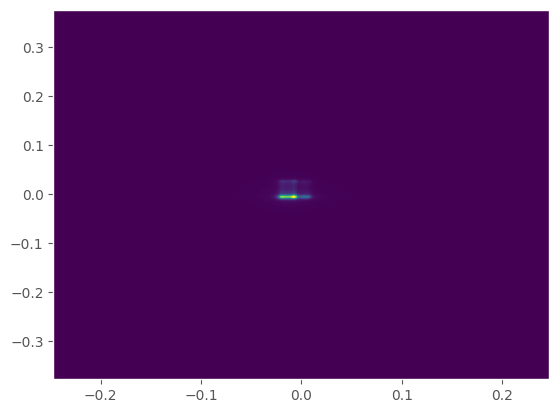

36 [0.003591147252024175, -11.084972381591797, 9.448099695075992]


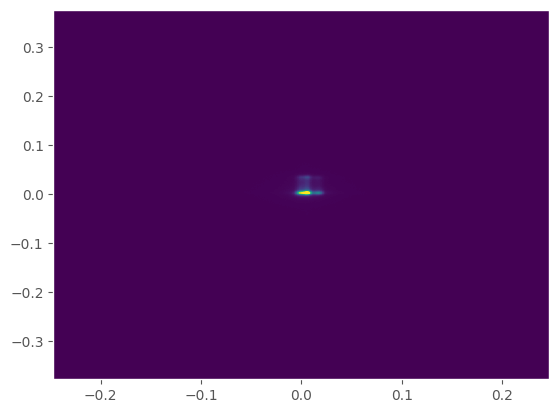

65 [0.007019008076363804, -11.085676193237305, 9.628456254468185]


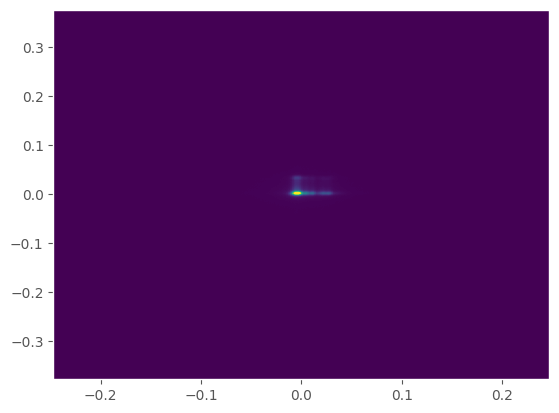

76 [0.008785082753463833, -11.084420204162598, 9.409055800306334]


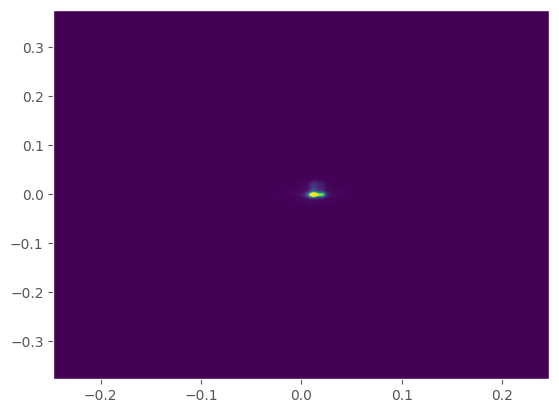

77 [0.012034626548241124, -11.088897705078125, 9.644682159926749]


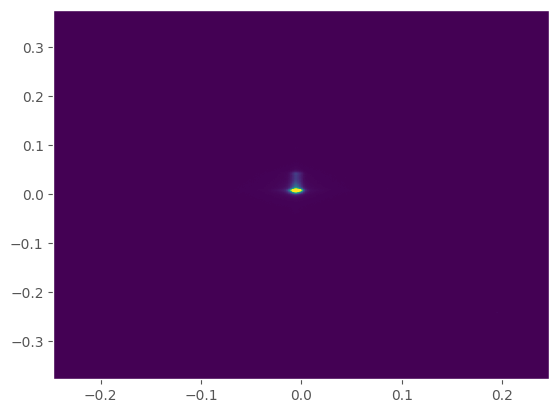

80 [0.01138408949173611, -11.087080955505371, 9.021560542491708]


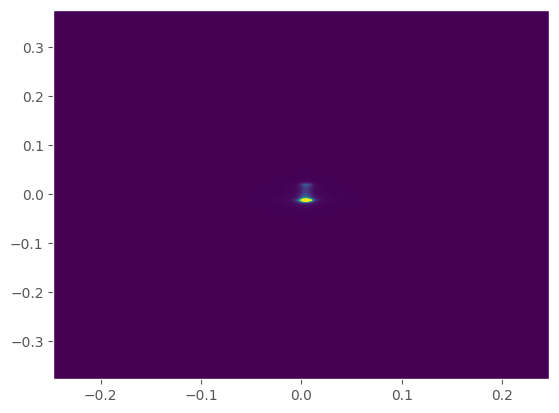

95 [0.01876288887605272, -11.088427543640137, 9.590733925351882]


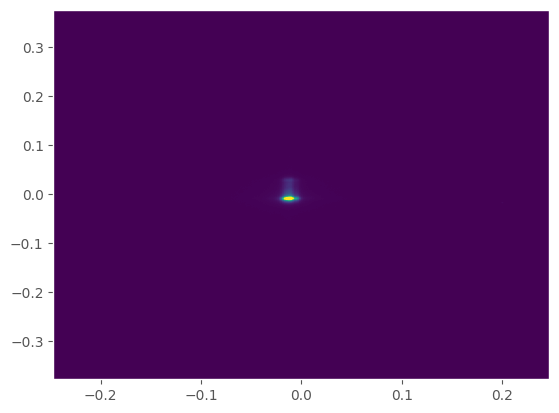

100 [0.058459644990706994, -11.088994026184082, 11.435019146425454]


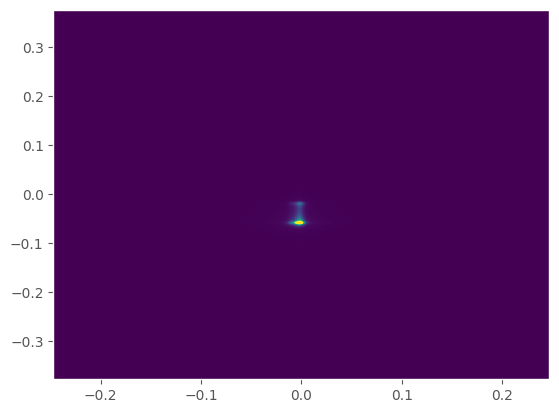

In [30]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [40]:
test_val_fns = [lambda t: t.values[0], lambda t: opt_common._get_fwhm_from_dw(t.user_attrs['dw']), lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)

domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins), domins[np.argmax(domins)])

128 118


30 [0.01037407627418629, -11.085554122924805, 9.489972038618548]


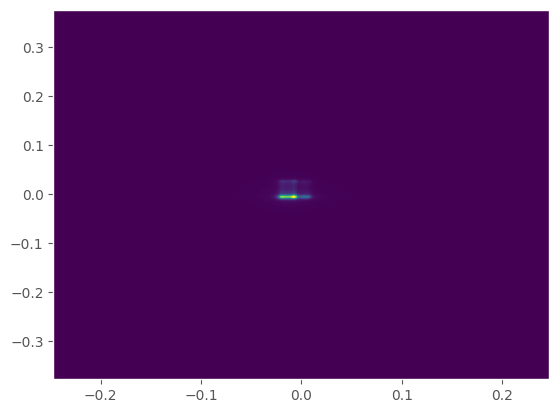

36 [0.003591147252024175, -11.084972381591797, 9.448099695075992]


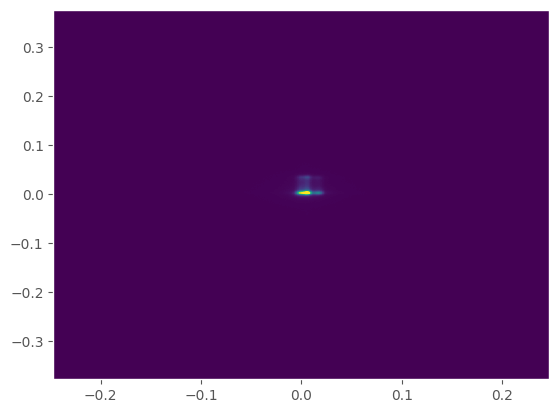

65 [0.007019008076363804, -11.085676193237305, 9.628456254468185]


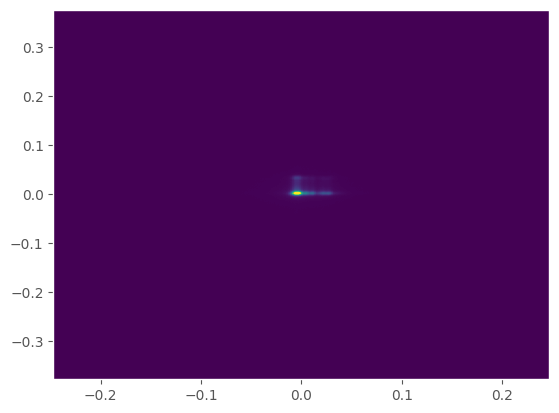

76 [0.008785082753463833, -11.084420204162598, 9.409055800306334]


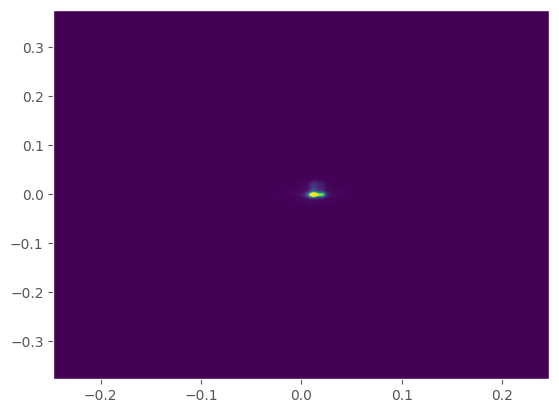

77 [0.012034626548241124, -11.088897705078125, 9.644682159926749]


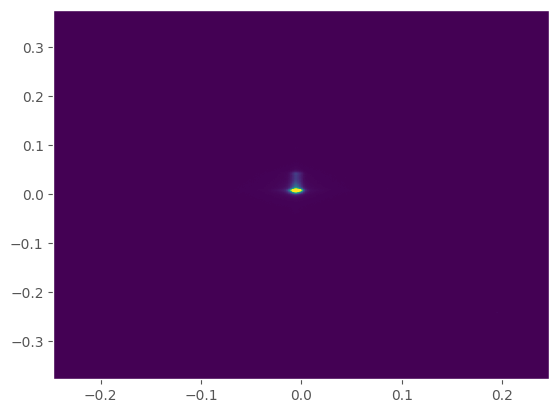

80 [0.01138408949173611, -11.087080955505371, 9.021560542491708]


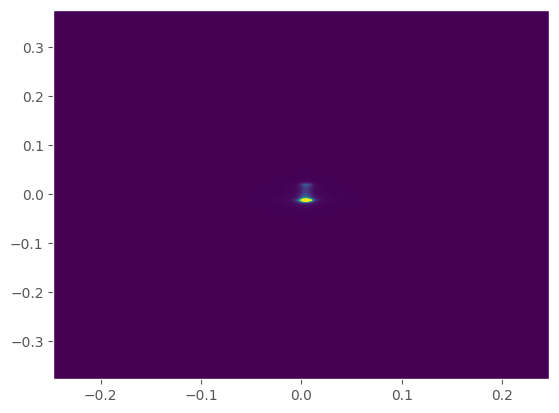

95 [0.01876288887605272, -11.088427543640137, 9.590733925351882]


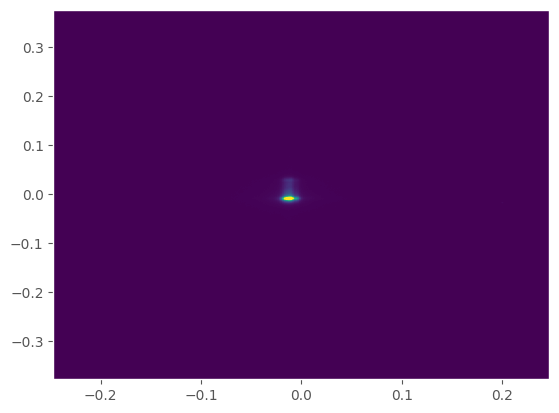

100 [0.058459644990706994, -11.088994026184082, 11.435019146425454]


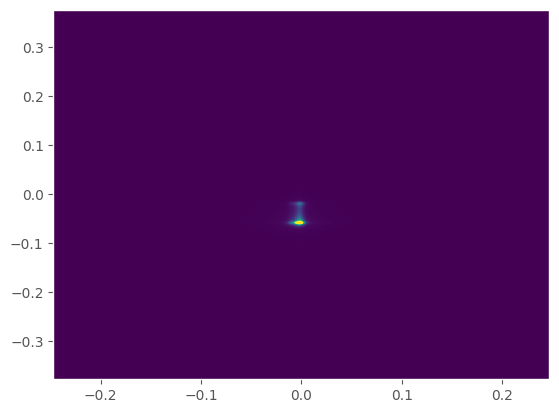

In [34]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()